In [1]:
#source: https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb
#https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

In [11]:
# Importing packages
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [12]:
# Importing the dataset
dataset= pd.read_csv('Data/car_v4_features.csv', index_col=0)

In [13]:
feature_cols =[
"Tot Dom Deposits to Tot Assets",
"Return On Assets",
"Net Op Inc to Assets",
"Pretax ROA",
"Assets per Emp",
"NonInterest Inc to Ave Asset",
"NonInterest Exp to Ave Asset",
"Yield on Earning Assets",
"Net Loans Lease to Tot Assets",
"RE to Ave Equity",
"Net Interest Margin",
"Efficiency Ratio",
"Core Capital Ratio",
"Equity to Assets",
"Noncurr Assets Other RE",
"Cost of Funding Earnings Assets",
"Noncurrent Loans to Loans",
"Number Employees",
"Return on Equity"
]

Pearson Correlation Heatmap

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

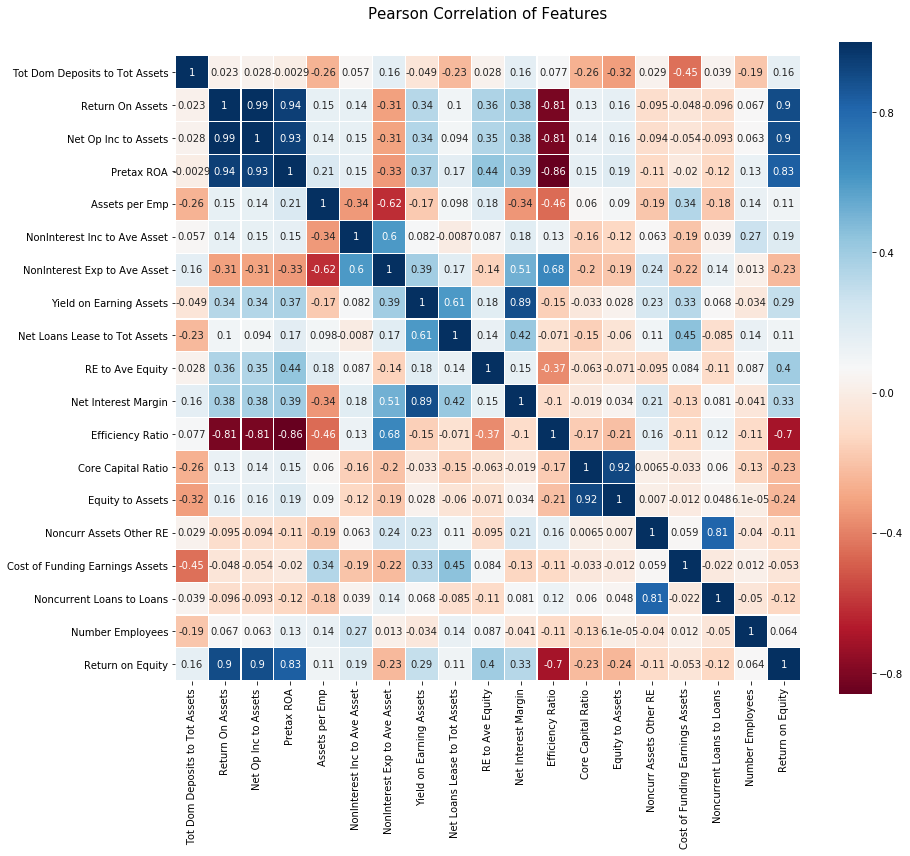

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
corr_matrix = dataset.corr()
corr_matrix["Return on Equity"].sort_values(ascending=False)

Return on Equity                   1.000000
Return On Assets                   0.902198
Net Op Inc to Assets               0.896573
Pretax ROA                         0.833479
RE to Ave Equity                   0.397373
Net Interest Margin                0.331300
Yield on Earning Assets            0.291997
NonInterest Inc to Ave Asset       0.189011
Tot Dom Deposits to Tot Assets     0.156165
Assets per Emp                     0.111296
Net Loans Lease to Tot Assets      0.106034
Number Employees                   0.064456
Cost of Funding Earnings Assets   -0.053281
Noncurr Assets Other RE           -0.110464
Noncurrent Loans to Loans         -0.121914
Core Capital Ratio                -0.225460
NonInterest Exp to Ave Asset      -0.233377
Equity to Assets                  -0.237779
Efficiency Ratio                  -0.704898
Name: Return on Equity, dtype: float64

 *What are the features?*

Features of this dataset were carefully selected and they represent most relevant ratios from each bank's Account Statements and Cash flow.


What is the response?

Return on Equity: This is our target variable, also known as our dependent variable we are trying to predict.

Because the response variable is continuous, this is a regression problem.
There are 4050 observations (represented by the rows), and each observation is representation of each bank.


List of features:

Tot Dom Deposits to Tot Assets

Return On Assets

Net Op Inc to Assets

Pretax ROA

Assets per Emp

NonInterest Inc to Ave Asset

NonInterest Exp to Ave Asset

Yield on Earning Assets

Net Loans Lease to Tot Assets

RE to Ave Equity

Net Interest Margin

Efficiency Ratio

Core Capital Ratio

Equity to Assets

Noncurr Assets Other RE

Cost of Funding Earnings Assets

Noncurrent Loans to Loans

Number Employees



Visualizing data using seaborn

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


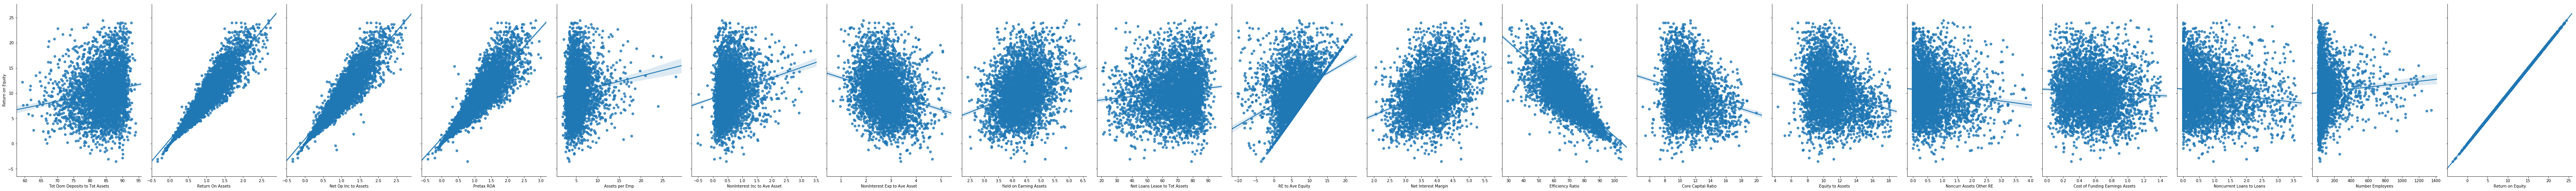

In [6]:

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars= feature_cols, y_vars='Return on Equity', size=7, aspect=0.7, kind='reg')


/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


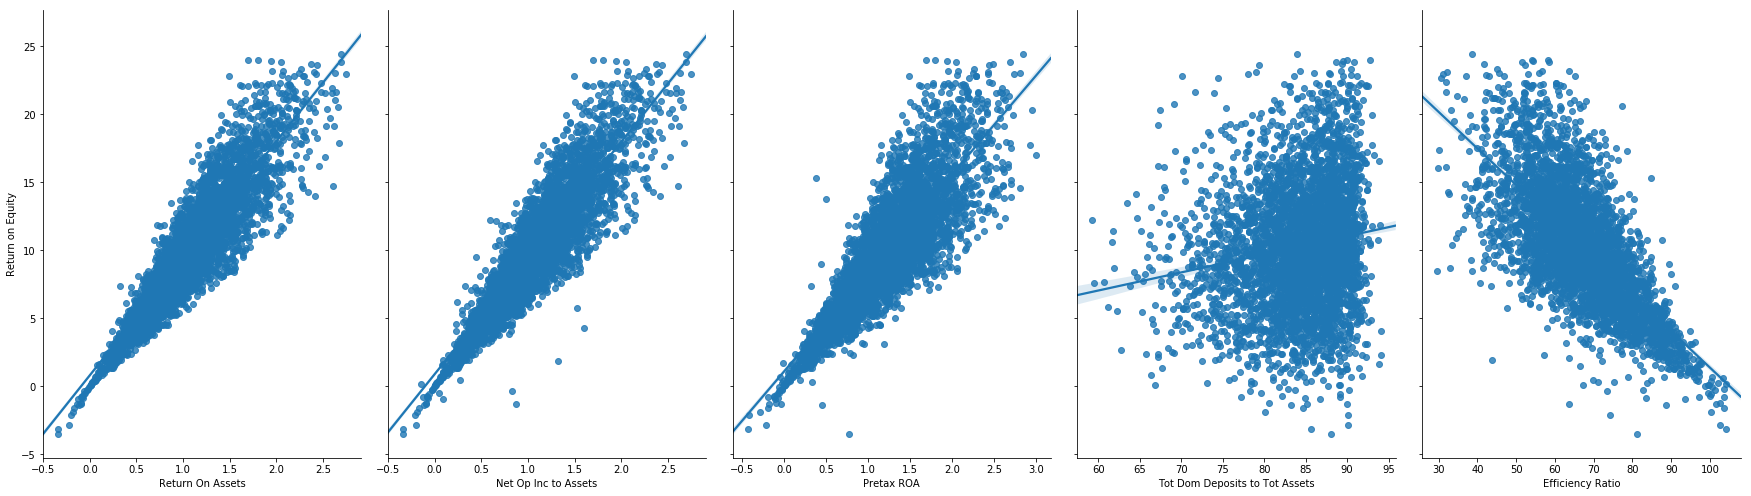

In [7]:

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['Return On Assets','Net Op Inc to Assets','Pretax ROA', 'Tot Dom Deposits to Tot Assets','Efficiency Ratio'], y_vars='Return on Equity', size=7, aspect=0.7, kind='reg')

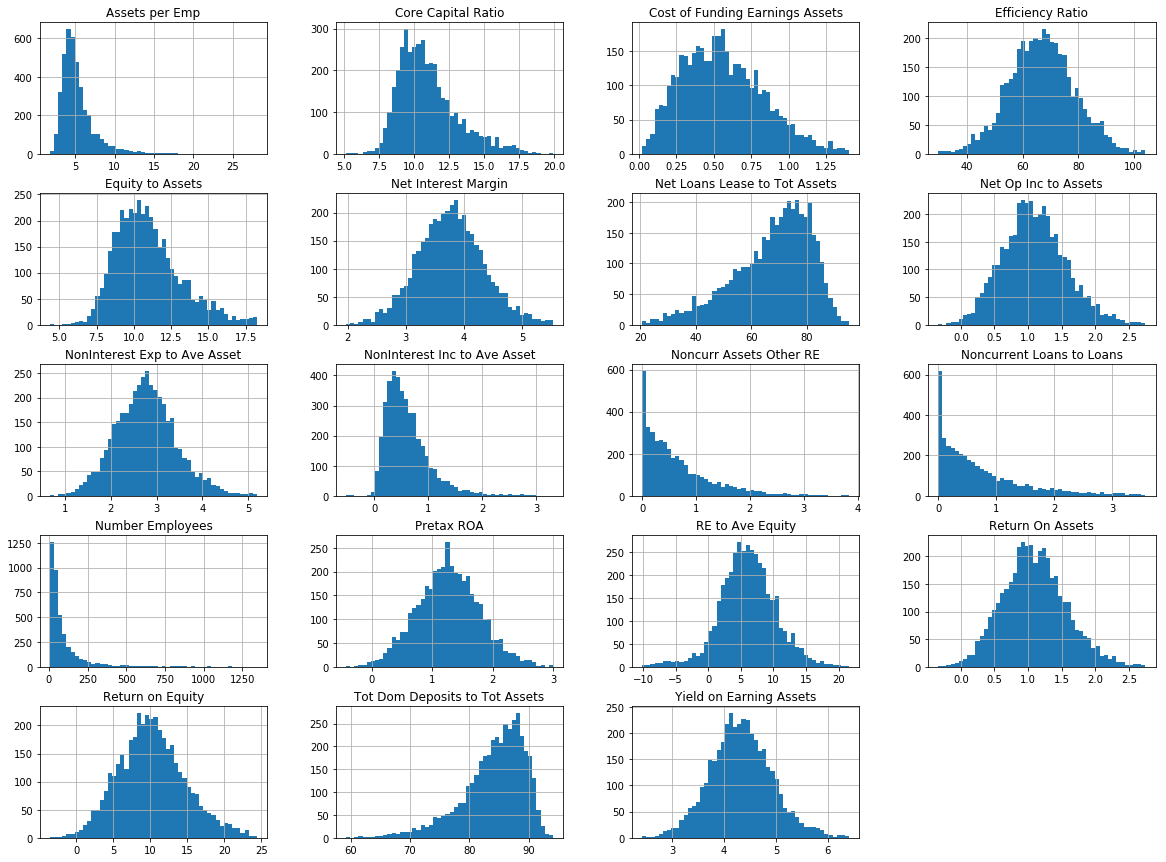

In [8]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response

$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)

$\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times Tot Dom Deposits to Tot Assets + \beta_2 \times Return On Assets + \beta_3 \times Net Op Inc to Assets$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Selecting, splitting X and y into training and testing sets

In [24]:
#Selecting the Inputs and Output
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3245, 18)
(3245,)
(812, 18)
(812,)


### Linear regression in scikit-learn

In [27]:

# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpreting model coefficients

In [28]:
# print the intercept and coefficients
#print(linreg.intercept_)
#print(linreg.coef_)
print('b: Intercept {}'.format(linreg.intercept_))
print('a: Coefficients: \n', linreg.coef_)

b: Intercept 10.062760745210355
a: Coefficients: 
 [ 1.06573978e-02  8.59825098e+00  7.46302761e-01 -2.98949442e-01
 -8.45723995e-03 -2.98684219e-01  4.98093144e-01  2.93251698e+07
  5.43578053e-04  3.69628220e-02 -2.93251702e+07 -2.34501908e-02
 -2.28452976e-03 -7.75858750e-01 -5.71176023e-02 -2.93251699e+07
 -2.14807386e-02 -2.91576525e-05]


In [29]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('Tot Dom Deposits to Tot Assets', 0.010657397764536464),
 ('Return On Assets', 8.598250980304911),
 ('Net Op Inc to Assets', 0.746302760773614),
 ('Pretax ROA', -0.29894944201309726),
 ('Assets per Emp', -0.008457239947025168),
 ('NonInterest Inc to Ave Asset', -0.2986842190788282),
 ('NonInterest Exp to Ave Asset', 0.4980931442168665),
 ('Yield on Earning Assets', 29325169.772668984),
 ('Net Loans Lease to Tot Assets', 0.0005435780525198081),
 ('RE to Ave Equity', 0.0369628220257408),
 ('Net Interest Margin', -29325170.236017518),
 ('Efficiency Ratio', -0.023450190814921095),
 ('Core Capital Ratio', -0.0022845297639921725),
 ('Equity to Assets', -0.7758587503542631),
 ('Noncurr Assets Other RE', -0.05711760228183272),
 ('Cost of Funding Earnings Assets', -29325169.91592493),
 ('Noncurrent Loans to Loans', -0.021480738597807313),
 ('Number Employees', -2.9157652459588235e-05)]

$$y = 9.69 + 0.0135 \times Tot Dom Deposits to Tot Assets + 8.688 \times Return On Assets + 0.6072 \times Net Op Inc to Assets  +  ...$$

How do we interpret the Return On Assets coefficient (8.688)?

For a given ratio data point increase of all remaining independent variables or features associated to the model, a "unit" increase in Return On Assets ratio is associated with a 8.688 "unit" increase in Return on Equity.

Or more clearly: For a given value of all ratios listed as features, an additional 1% point increase on Return On Assets is associated with an increase in Return on Equity of 8.688 items.

Important notes:

This is a statement of association, not causation.
If an increase in Return On Assets was associated with a decrease in Return of Equity, $\beta_1$ would be negative.


### Making predictions

In [30]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [31]:
true = y_test
pred = y_pred

### Mean Absolute Error (MAE) is the mean of the absolute value of the errors:



Mean Squared Error (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [32]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

0.585838570826047


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [33]:
#calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

0.8534111216869061


Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Return on Equity predictions

In [34]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8534111216869061


> The plot shows the importance of each variable to predict **Return on Equity**.

Mean Absolute Error (MAE): 0.585838570826047
Variance score (R^2): 0.9635508413615825


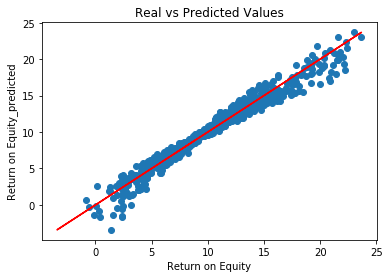

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred

print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(true, pred)))
print('Variance score (R^2): {}'.format(r2_score(y_test, y_pred)))

plt.title('Real vs Predicted Values')
plt.xlabel('Return on Equity')
plt.ylabel('Return on Equity_predicted')

plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, color='red')

In [37]:
"""
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
kf = KFold(shuffle=True)

scores = cross_val_score(linreg, X_test, y_test, scoring="neg_mean_absolute_error", cv=kf)

print('MAE: {}'.format(-scores))
print('MAE_mean: {}'.format(-scores.mean()))
"""

MAE: [0.57559925 0.58246801 0.68013597]
MAE_mean: 0.612734409519639


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [43]:
"""
results = pd.DataFrame({
    'Real Length': y_test,
    'Predicted Length': y_pred,
    'Difference': np.abs(y_test - y_pred)
}, columns=['Real Length', 'Predicted Length', 'Difference'])

results
"""

,Real Length,Predicted Length,Difference
0,8.870774,8.852541,0.018233
1,5.482688,5.778280,0.295592
2,10.461319,10.598567,0.137247
3,9.316523,9.517354,0.200831
4,3.411391,4.124886,0.713495
5,8.549303,8.805654,0.256352
6,4.125660,4.178162,0.052502
7,11.104065,12.805287,1.701222
8,6.298028,6.406955,0.108927
9,4.787401,5.217292,0.429891
